<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


*   Identify the distribution of data in the dataset.

*   Identify outliers in the dataset.

*   Remove outliers from the dataset.

*   Identify correlation between features in the dataset.


***


## Hands on Lab


Import the pandas module.


In [5]:
import pandas as pd

Load the dataset into a dataframe.


In [6]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

In [7]:
df["ConvertedComp"]

0         61000.0
1         95179.0
2         90000.0
3        455352.0
4         65277.0
           ...   
11393    130000.0
11394     19880.0
11395    105000.0
11396     80371.0
11397         NaN
Name: ConvertedComp, Length: 11398, dtype: float64

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


Text(0, 0.5, 'Number of Respondents')

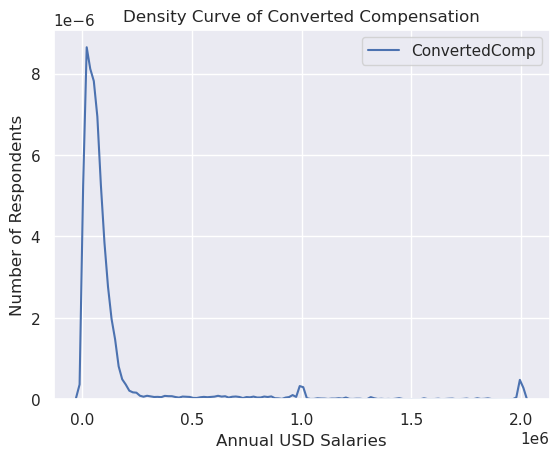

In [8]:
# your code goes here
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="darkgrid")

# Draw the density plot
sns.kdeplot(df['ConvertedComp'])

#sns.distplot(df['ConvertedComp'], hist = False, kde = True, kde_kws = {'linewidth': 3})

# Plot formatting
plt.title('Density Curve of Converted Compensation')
plt.xlabel('Annual USD Salaries')
plt.ylabel('Number of Respondents')



Plot the histogram for the column `ConvertedComp`.


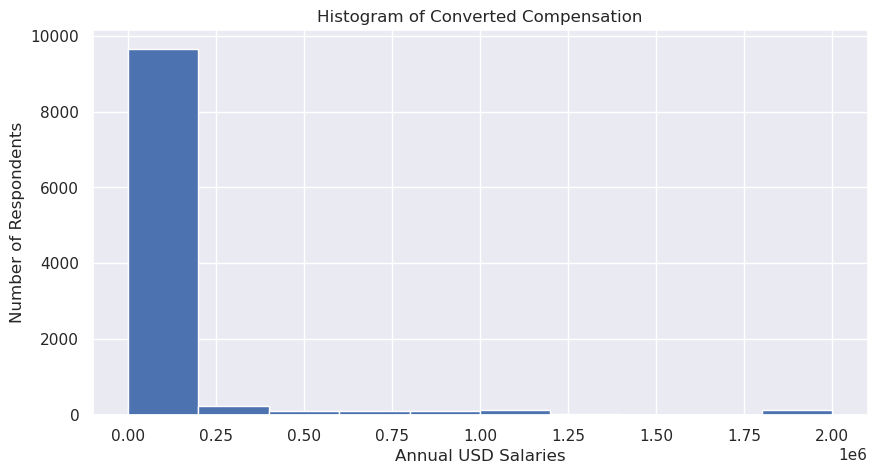

In [10]:
# your code goes here
df['ConvertedComp'].plot(kind='hist', figsize=(10, 5))

#sns.distplot( a=df["ConvertedComp"], hist=True, kde=False, rug=False )
# Plot formatting
plt.title('Histogram of Converted Compensation')
plt.xlabel('Annual USD Salaries')
plt.ylabel('Number of Respondents')
plt.show()


What is the median of the column `ConvertedComp`?


In [11]:
# your code goes here
df['ConvertedComp'].describe()

count    1.058200e+04
mean     1.315967e+05
std      2.947865e+05
min      0.000000e+00
25%      2.686800e+04
50%      5.774500e+04
75%      1.000000e+05
max      2.000000e+06
Name: ConvertedComp, dtype: float64

How many responders identified themselves only as a **Man**?


In [17]:
# your code goes here
df['Gender'].value_counts()

Man                                                            10480
Woman                                                            731
Non-binary, genderqueer, or gender non-conforming                 63
Man;Non-binary, genderqueer, or gender non-conforming             26
Woman;Non-binary, genderqueer, or gender non-conforming           14
Woman;Man                                                          9
Woman;Man;Non-binary, genderqueer, or gender non-conforming        2
Name: Gender, dtype: int64

Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [18]:
# your code goes here
df.loc[(df['Gender'] == 'Woman'), 'ConvertedComp'].median()

57708.0

Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [20]:
# your code goes here
df['Age'].median()

29.0

Plot a histogram of the column `Age`.


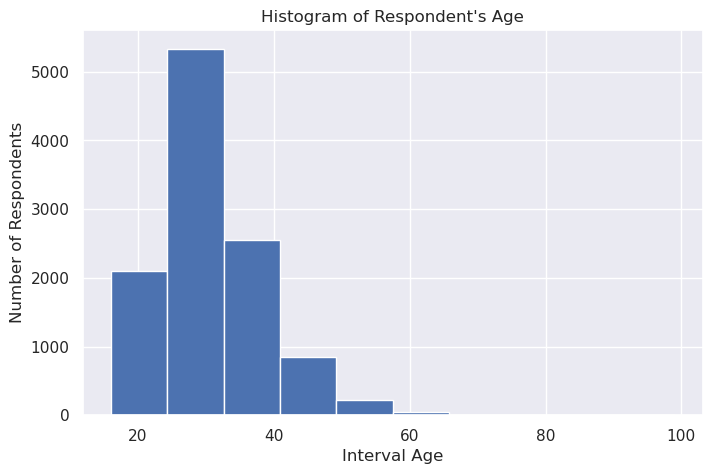

In [51]:
# your code goes here
df['Age'].plot(kind='hist', figsize=(8, 5))

# add a title to the histogram
plt.title("Histogram of Respondent's Age")
# add y-label
plt.ylabel('Number of Respondents')
# add x-label
plt.xlabel('Interval Age')

plt.show()

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


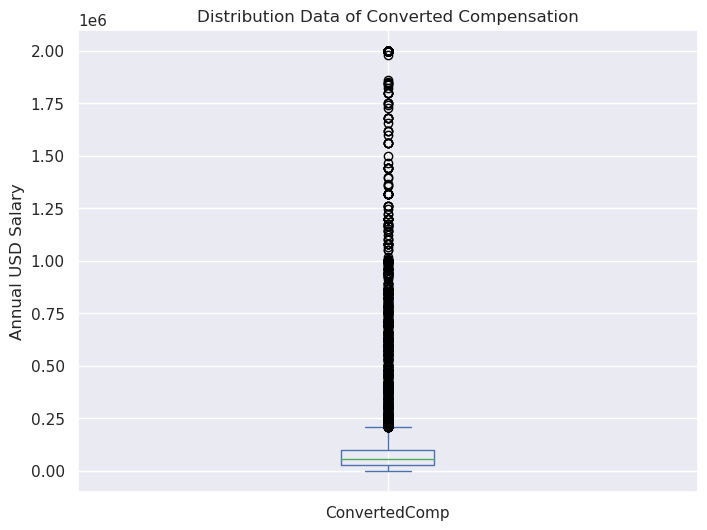

In [52]:
# your code goes here
df['ConvertedComp'].plot(kind='box', figsize=(8, 6))

plt.title('Distribution Data of Converted Compensation')
plt.ylabel('Annual USD Salary')

plt.show()

In [26]:
df['ConvertedComp'].describe()

count    1.058200e+04
mean     1.315967e+05
std      2.947865e+05
min      0.000000e+00
25%      2.686800e+04
50%      5.774500e+04
75%      1.000000e+05
max      2.000000e+06
Name: ConvertedComp, dtype: float64

In [27]:
df['ConvertedComp'].median()

57745.0

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [33]:
# your code goes here
Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)
IQR = Q3-Q1
IQR

73132.0

Find out the upper and lower bounds.


In [29]:
# your code goes here
upper_bounds = Q3 + 1.5 * IQR
print('Upper Bounds :', upper_bounds)
lower_bounds = Q1 - 1.5*IQR
print('Lower Bounds :', lower_bounds)

Upper Bounds : 209698.0
Lower Bounds : -82830.0


Identify how many outliers are there in the `ConvertedComp` column.


In [32]:
# your code goes here
outlier =[]
for x in df['ConvertedComp']:
  if ((x > upper_bounds) or (x < lower_bounds)):
    outlier.append(x)

print('', outlier)
print('Outlier in the ConvertedComp column is', len(outlier))

 [455352.0, 1100000.0, 229016.0, 2000000.0, 1000000.0, 962424.0, 960000.0, 2000000.0, 233000.0, 649536.0, 235525.0, 864000.0, 1000000.0, 471048.0, 618708.0, 2000000.0, 2000000.0, 2000000.0, 235525.0, 1750000.0, 412464.0, 412464.0, 275000.0, 230000.0, 230000.0, 232000.0, 706572.0, 2000000.0, 730128.0, 1000000.0, 2000000.0, 360000.0, 494964.0, 1620000.0, 942096.0, 714948.0, 209931.0, 238000.0, 467460.0, 643764.0, 1000000.0, 1152000.0, 318864.0, 728700.0, 230000.0, 1000000.0, 260000.0, 210973.0, 2000000.0, 1368000.0, 1000000.0, 646200.0, 673704.0, 2000000.0, 2000000.0, 1000000.0, 864000.0, 934380.0, 2000000.0, 960000.0, 930612.0, 481212.0, 522456.0, 2000000.0, 225000.0, 400000.0, 1000000.0, 220000.0, 720000.0, 2000000.0, 384744.0, 852072.0, 1000000.0, 960000.0, 1000000.0, 2000000.0, 2000000.0, 2000000.0, 270000.0, 2000000.0, 209892.0, 1000000.0, 530400.0, 957804.0, 866436.0, 824940.0, 2000000.0, 696000.0, 851820.0, 481212.0, 220000.0, 1000000.0, 577452.0, 2000000.0, 1000000.0, 962424.0, 2

In [36]:
df_removed_outlier.describe()

count      9703.000000
mean      59883.208389
std       43394.336755
min           0.000000
25%       24060.000000
50%       52704.000000
75%       85574.500000
max      209356.000000
Name: ConvertedComp, dtype: float64

In [37]:
df_removed_outlier.median()

52704.0

Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [35]:
# your code goes here
df_removed_outlier = df['ConvertedComp'][~((df['ConvertedComp'] < lower_bounds) | 
                                           (df['ConvertedComp'] > upper_bounds))]

df_removed_outlier

0         61000.0
1         95179.0
2         90000.0
4         65277.0
5         31140.0
           ...   
11393    130000.0
11394     19880.0
11395    105000.0
11396     80371.0
11397         NaN
Name: ConvertedComp, Length: 10519, dtype: float64

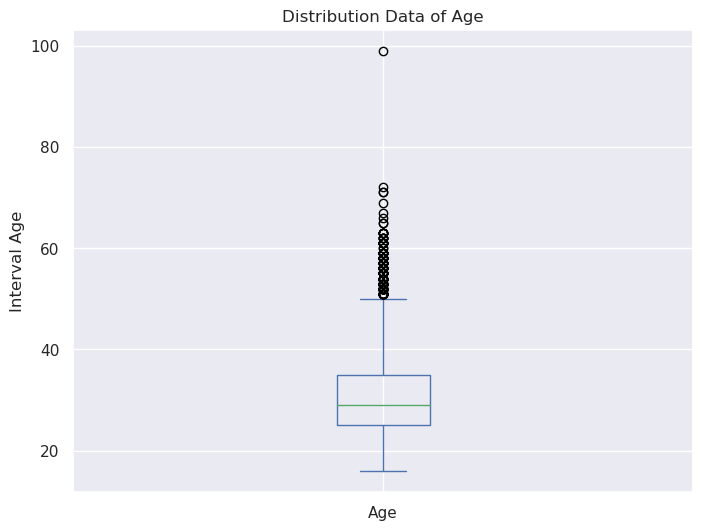

In [38]:
df['Age'].plot(kind='box', figsize=(8, 6))

plt.title('Distribution Data of Age')
plt.ylabel('Interval Age')

plt.show()

## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


<AxesSubplot:>

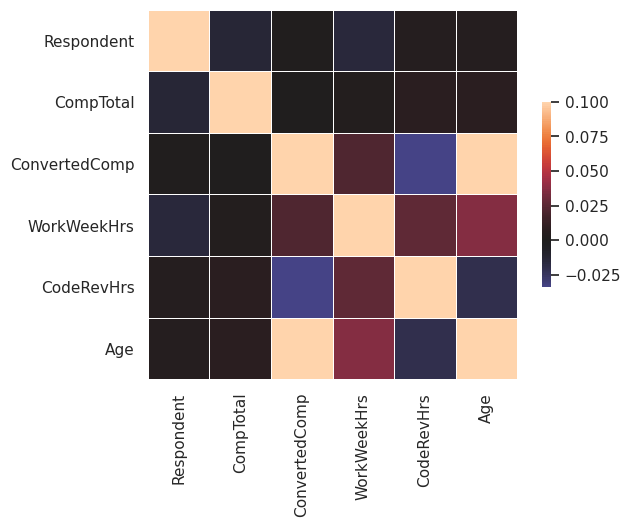

In [52]:
# your code goes here



#import seaborn as sns
corr = df.corr()
#cmap = sns.diverging_palette(230, 20, as_cmap=True)
#plt.figure(figsize=(8,6))
#sns.heatmap(corr, cmap=cmap, annot=True, center=0, vmin=-1, square=True, linewidths=.5)
#plt.tight_layout()
#plt.show()
sns.heatmap(corr, vmax=.1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2022-01-01&cm_mmc=Email_Newsletter-\_-Developer_Ed%2BTech-\_-WW_WW-\_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
